## Code to bring in and downsample the forcings

This code works off the xarray builder code first

In [6]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import time
import xarray as xr

In [7]:
# Define the path to all of the data you want to load
path = '/srv/shared/deep_stac/data/forcings/2017/*2017.nc'
# Make the path a global varaible and make a list of the files 
flist=glob.glob(path)
print(len(flist))

17


In [8]:
# Open and filter to the 'primary' forcings 
fpth = './../../forcings_key.txt'
key = np.genfromtxt(fpth, dtype='str', delimiter=',')

len(key)

pared = key[key[:,1]=='primary']
pared[:,0]



array(['pr_2015.nc', 'rmax_2015.nc', 'rmin_2015.nc', 'sph_2015.nc',
       'srad_2015.nc', 'th_2015.nc', 'tmmn_2015.nc', 'tmmx_2015.nc',
       'vs_2015.nc'], dtype='<U56')

In [12]:
!ls /srv/shared/deep_stac/data/forcings/2017/

bi_2017.nc	fm100_2017.nc  rmax_2017.nc  th_2017.nc    vs_2017.nc
erc_2017.nc	pdsi_2017.nc   rmin_2017.nc  tmmn_2017.nc
etr_2017.nc	pet_2017.nc    sph_2017.nc   tmmx_2017.nc
fm1000_2017.nc	pr_2017.nc     srad_2017.nc  vpd_2017.nc


In [16]:
path
da = xr.open_dataset('/srv/shared/deep_stac/data/forcings/2017/vs_2017.nc', decode_cf=False)
da

<xarray.Dataset>
Dimensions:     (crs: 1, day: 365, lat: 585, lon: 1386)
Coordinates:
  * lon         (lon) float64 -124.8 -124.7 -124.7 ... -67.14 -67.1 -67.06
  * lat         (lat) float64 49.4 49.36 49.32 49.28 ... 25.19 25.15 25.11 25.07
  * day         (day) float64 4.273e+04 4.274e+04 ... 4.31e+04 4.31e+04
  * crs         (crs) uint16 3
Data variables:
    wind_speed  (day, lat, lon) uint16 ...
Attributes:
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    geospatial_lon_max:         -67.058333300000015
    geospatial_lon_resolution:  0.041666666666666
    geospatial_lat_resolution:  0.041666666666666
    geospatial_lat_units:       decimal_degrees north
    geospatial_lon_units:       decimal_degrees east
    coordin

In [14]:
path
da = xr.open_dataset('/srv/shared/deep_stac/data/forcings/2017/pr_2017.nc')
da

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'precipitation_amount' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)


<xarray.Dataset>
Dimensions:               (crs: 1, day: 365, lat: 585, lon: 1386)
Coordinates:
  * lon                   (lon) float64 -124.8 -124.7 -124.7 ... -67.1 -67.06
  * lat                   (lat) float64 49.4 49.36 49.32 ... 25.15 25.11 25.07
  * day                   (day) datetime64[ns] 2017-01-01 ... 2017-12-31
  * crs                   (crs) uint16 3
Data variables:
    precipitation_amount  (day, lat, lon) float32 ...
Attributes:
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    geospatial_lon_max:         -67.058333300000015
    geospatial_lon_resolution:  0.041666666666666
    geospatial_lat_resolution:  0.041666666666666
    geospatial_lat_units:       decimal_degrees north
    geospatial_lon_units:      

In [19]:
ds=xr.open_mfdataset?

Signature:
xr.open_mfdataset(
    paths,
    chunks=None,
    concat_dim='_not_supplied',
    compat='no_conflicts',
    preprocess=None,
    engine=None,
    lock=None,
    data_vars='all',
    coords='different',
    combine='_old_auto',
    autoclose=None,
    parallel=False,
    **kwargs,
)
Docstring:
Open multiple files as a single dataset.

If combine='by_coords' then the function ``combine_by_coords`` is used to 
combine the datasets into one before returning the result, and if 
combine='nested' then ``combine_nested`` is used. The filepaths must be 
structured according to which combining function is used, the details of 
which are given in the documentation for ``combine_by_coords`` and 
``combine_nested``. By default the old (now deprecated) ``auto_combine`` 
will be used, please specify either ``combine='by_coords'`` or 
``combine='nested'`` in future. Requires dask to be installed. See 
documentation for details on dask [1]. Attributes from the first dataset 
file are used 

In [23]:
ds=xr.open_mfdataset(['/srv/shared/deep_stac/data/forcings/2017/vs_2017.nc','/srv/shared/deep_stac/data/forcings/2017/pr_2017.nc'], combine='by_coords', )

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'wind_speed' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)
/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'precipitation_amount' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)


In [24]:
ds

<xarray.Dataset>
Dimensions:               (crs: 1, day: 365, lat: 585, lon: 1386)
Coordinates:
  * lon                   (lon) float64 -124.8 -124.7 -124.7 ... -67.1 -67.06
  * lat                   (lat) float64 49.4 49.36 49.32 ... 25.15 25.11 25.07
  * day                   (day) datetime64[ns] 2017-01-01 ... 2017-12-31
  * crs                   (crs) uint16 3
Data variables:
    precipitation_amount  (day, lat, lon) float32 dask.array<shape=(365, 585, 1386), chunksize=(365, 585, 1386)>
    wind_speed            (day, lat, lon) float32 dask.array<shape=(365, 585, 1386), chunksize=(365, 585, 1386)>
Attributes:
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    geospatial_lon_max:         -67.058333300000015
    geospatia

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)


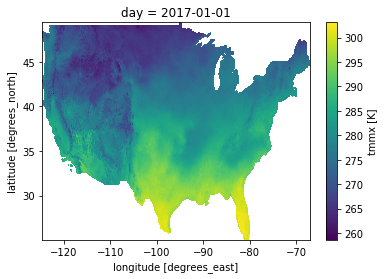

In [4]:
# Working with one dataset is better than many for learning

path1 = '/srv/shared/deep_stac/data/forcings/2017/tmmx_2017.nc'
d1 = xr.open_dataset(path1)
# d1['day'][0]['air_temperature'].plot
d1
temp=d1.air_temperature
temp.isel(day=0).plot()
#day["air_temperature"][0].plot

In [13]:
topo = '/home/jovyan/shared/deep_stac/data/topo.nc'
dstopo = xr.open_dataset(topo)
dstopo.close()
dstopo.expand_dims('time')

<xarray.Dataset>
Dimensions:     (time: 1, x: 17569, y: 17002)
Coordinates:
  * y           (y) float32 4230327.0 4230324.0 ... 4179327.0 4179324.0
  * x           (x) float32 254007.0 254010.0 254013.0 ... 306708.0 306711.0
Dimensions without coordinates: time
Data variables:
    veg_height  (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 17.5 17.5 17.5 17.5
    veg_tau     (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    veg_k       (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    veg_type    (time, y, x) uint32 3294 3294 3294 3294 ... 3033 3033 3033 3033
    dem         (time, y, x) float32 2633.369 2635.3313 ... 3064.8484 3064.3577
    mask        (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    projection  (time) |S1 b''
Attributes:
    last_modified:       [2019-08-08 17:17:16] Data added or updated
    Conventions:         CF-1.6
    dateCreated:         2019-08-08 17:17:34
    Title:               Topographic Images for S

In [14]:
dstopo

<xarray.Dataset>
Dimensions:     (x: 17569, y: 17002)
Coordinates:
  * y           (y) float32 4230327.0 4230324.0 ... 4179327.0 4179324.0
  * x           (x) float32 254007.0 254010.0 254013.0 ... 306708.0 306711.0
Data variables:
    veg_height  (y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 17.5 17.5 17.5 17.5 17.5
    veg_tau     (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    veg_k       (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    veg_type    (y, x) uint32 3294 3294 3294 3294 3294 ... 3033 3033 3033 3033
    dem         (y, x) float32 2633.369 2635.3313 ... 3064.8484 3064.3577
    mask        (y, x) uint8 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0
    projection  |S1 b''
Attributes:
    last_modified:       [2019-08-08 17:17:16] Data added or updated
    Conventions:         CF-1.6
    dateCreated:         2019-08-08 17:17:34
    Title:               Topographic Images for SMRF/AWSM
    history:             [2019-08-08 17:17:34] Create ne